### Atividade 03: Filtragem de Sinais

### Questão 1: 
Mostre que o problema de ﬁltragem com regularização de Tikhonov pode ser formulado como um problema de quadrados mínimos. Mostre que o problema de ﬁltragem com regularização do tipo LASSO pode ser formulado como um problema de otimização quadrática. Conclua que os dois problemas de otimização propostos são convexos.

#### **Resposta:**
O segrego para transformar o problema de regularização de Tikhonov como um problema de quadrados mínimos é interpretar os dois termos que se somam como um operador conjunto, isto é, tome 

$$ \tilde{A} =\begin{bmatrix}
A \\ \sqrt{\delta} D
\end{bmatrix}, \quad \tilde{b} = \begin{bmatrix} b \\ 0\end{bmatrix}$$

Assim temos

\begin{align*}
\max_{u \in \mathbb{R}^n} &  \left\| \tilde{A}u - \tilde{b} \right\|_{2}^{2}  \nonumber \\
\end{align*}

Recuperamos o problema original expandindo os termos:

$$ \left\| \tilde{A}u - \tilde{b} \right\|_{2}^{2} = \left\|\begin{bmatrix}
A \\ \sqrt{\delta} D
\end{bmatrix}u - \begin{bmatrix} b \\ 0\end{bmatrix} \right\| = \left\| Au - b\right\|^{2}_2 + \left\|\sqrt{\delta} Du \right\|^{2}_2 = \left\| Au - b\right\|^{2}_2 + \delta\left\|Du \right\|^{2}_2 $$ 

Para o caso do LASSO conseguimos transformar o problema em uma formulação de programação quadrática colocando
algumas variáveis adicionais, da seguinte forma:

![lasso-qp1](lasso-qp1.png)

Sendo assim o problema se torna: 

![lasso-qp2](lasso-qp2.png)

(Sim é dos slides fiquei com preguiça de escrever em Latex mas eu entendi o conceito (^_^;) , que limitamos a norma por um vetor de variáveis que amarrar o valor máximo das variáveis dos módulos)

Para concluir, quadrados mínimos é um exemplo de QP (programação quadratica) e como acabamos de mostrar que LASSO também é QP, assim como sabemos que QP é uma subclasse de problemas de otimização convexa (isto é, função objetivo convexa e conjunto de restrições convexo), então esses problemas são problemas de otimização convexa.


**Questão 2:** Implemente, com a ajuda do cvx, cvxpy ou outro parser/solver, uma função para cada uma das abordagens
destacadas acima, fornecendo a solução para xc e δ dados.

**Resposta:**

In [42]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

def lasso_denoise(y, delta=1.0):
    n = len(y)
    x = cp.Variable(n)
    
    # Objetivo: vamos minimizar ||x - y||_2^2 + delta * ||Dx||_1
    D = np.eye(n) - np.eye(n, k=-1)  # Aqui é onde tentamos fazer a matriz das diferenças
    D = D[1:, :]  # Remove a primeira linha
    
    objective = cp.Minimize(cp.sum_squares(x - y) + delta * cp.norm(D @ x, 1))
    problem = cp.Problem(objective)
    problem.solve()
    
    return x.value

def tikhonov_denoise(y, delta=1.0):
    # Aqui é essencialmente a mesma coisa mas com uma norma euclidiana
    n = len(y)
    x = cp.Variable(n)
    D = np.eye(n) - np.eye(n, k=-1)  
    D = D[1:, :]  
    
    objective = cp.Minimize(cp.sum_squares(x - y) + delta * cp.sum_squares(D @ x))
    problem = cp.Problem(objective)
    problem.solve()
    
    return x.value



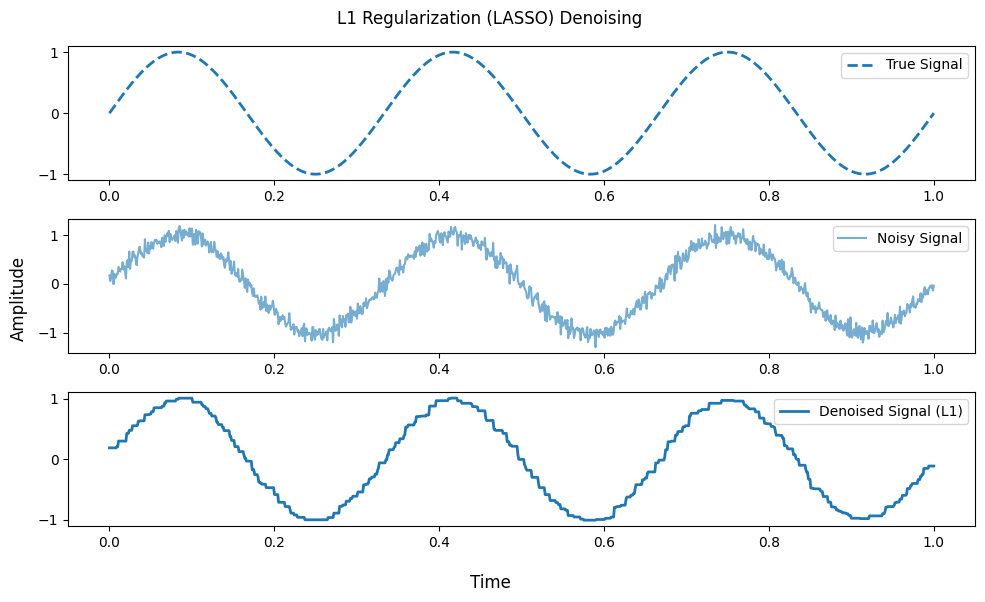

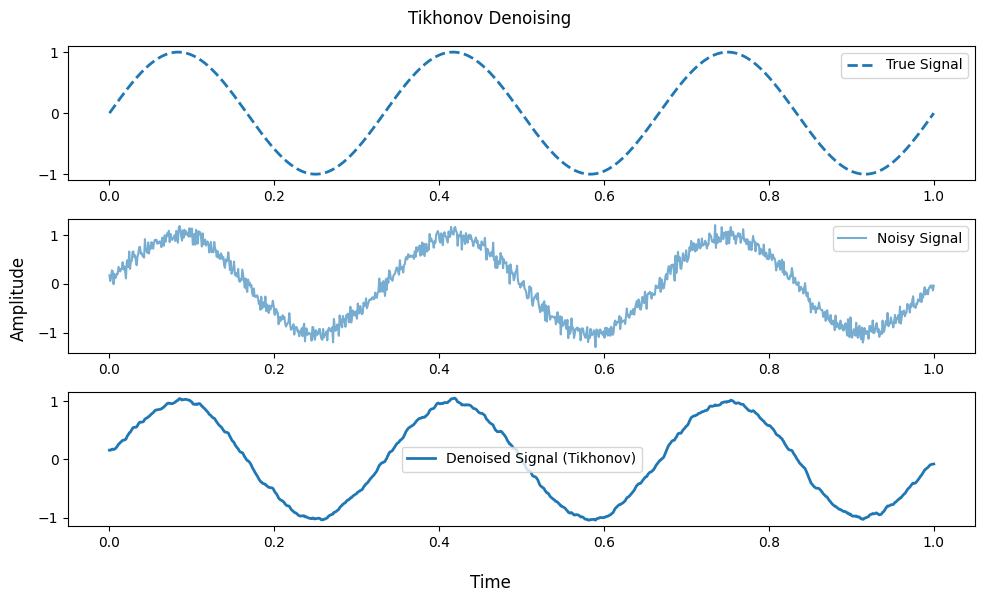

In [52]:
# Para a onda senoidal
if __name__ == "__main__":
    np.random.seed(0)
    N = 1000
    t = np.linspace(0, 1, N)
    mu = 0
    sigma = np.sqrt(0.01)
    true_signal = np.sin(2 * np.pi * t * 3)  # True signal (sine wave)
    noisy_signal = true_signal + np.random.normal(mu, sigma, N)  # Add Gaussian noise
    
    # Denoise with L1 regularization
    denoised_signal = lasso_denoise(noisy_signal, delta=0.65)
    
    # Plota
    fig, axs = plt.subplots(3, figsize=(10, 6))
    fig.suptitle("L1 Regularization (LASSO) Denoising")
    fig.supxlabel("Time")
    fig.supylabel("Amplitude")
   
    axs[0].plot(t, true_signal, label="True Signal", linestyle="--", linewidth=2)
    axs[0].legend()
    
    axs[1].plot(t, noisy_signal, label="Noisy Signal", alpha=0.6)
    axs[1].legend()

    axs[2].plot(t, denoised_signal, label="Denoised Signal (L1)", linewidth=2)
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    # Denoise with Tikhonov regularization
    denoised_signal = tikhonov_denoise(noisy_signal, delta=10)
    
    # Plota
    fig, axs = plt.subplots(3, figsize=(10, 6))
    fig.suptitle("Tikhonov Denoising")
    fig.supxlabel("Time")
    fig.supylabel("Amplitude")
   
    axs[0].plot(t, true_signal, label="True Signal", linestyle="--", linewidth=2)
    axs[0].legend()
    
    axs[1].plot(t, noisy_signal, label="Noisy Signal", alpha=0.6)
    axs[1].legend()

    axs[2].plot(t, denoised_signal, label="Denoised Signal (Tikhonov)", linewidth=2)
    axs[2].legend()

    plt.tight_layout()
    plt.show() 

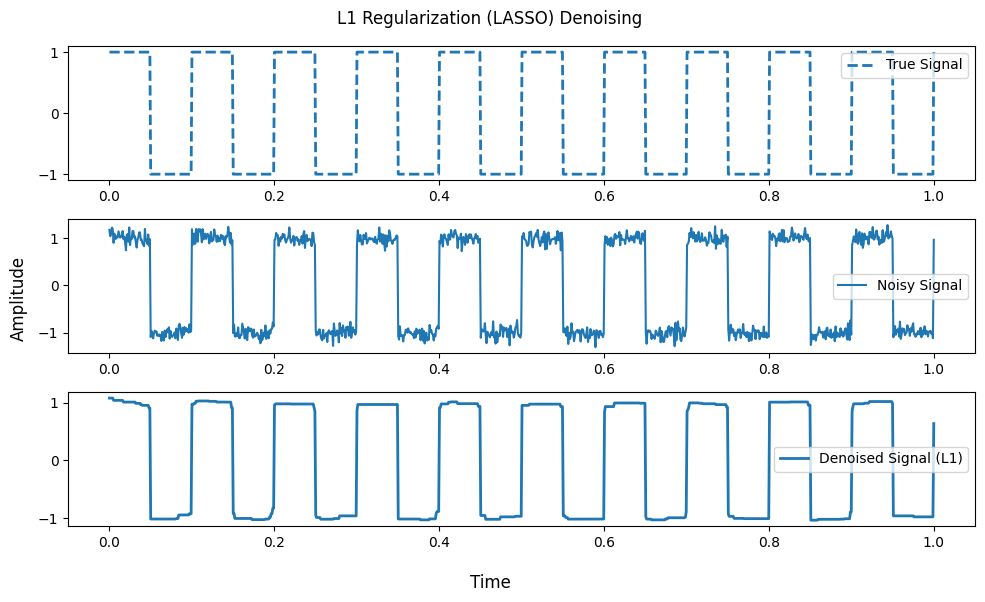

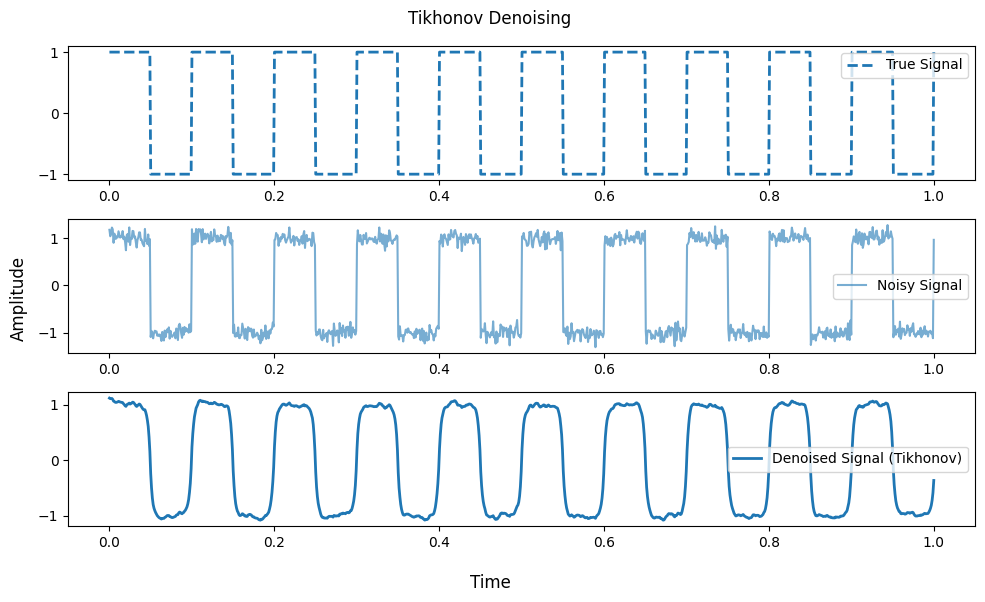

In [53]:
# Para a onda quadrada
from scipy import signal
if __name__ == "__main__":
    np.random.seed(0)
    N = 1000
    t = np.linspace(0, 1, N)
    mu = 0
    sigma = np.sqrt(0.01)
    true_signal = signal.square(2 * np.pi * t * 10)  # True signal (sine wave)
    noisy_signal = true_signal + np.random.normal(mu, sigma, N)  # Add Gaussian noise
    
    # Denoise with L1 regularization
    denoised_signal = lasso_denoise(noisy_signal, delta=0.65)
    
    # Plota
    fig, axs = plt.subplots(3, figsize=(10, 6))
    fig.suptitle("L1 Regularization (LASSO) Denoising")
    fig.supxlabel("Time")
    fig.supylabel("Amplitude")
   
    axs[0].plot(t, true_signal, label="True Signal", linestyle="--", linewidth=2)
    axs[0].legend()
    
    axs[1].plot(t, noisy_signal, label="Noisy Signal", alpha=1)
    axs[1].legend()

    axs[2].plot(t, denoised_signal, label="Denoised Signal (L1)", linewidth=2)
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    # Denoise with Tikhonov regularization
    denoised_signal = tikhonov_denoise(noisy_signal, delta=6)
    
    # Plota
    fig, axs = plt.subplots(3, figsize=(10, 6))
    fig.suptitle("Tikhonov Denoising")
    fig.supxlabel("Time")
    fig.supylabel("Amplitude")
   
    axs[0].plot(t, true_signal, label="True Signal", linestyle="--", linewidth=2)
    axs[0].legend()
    
    axs[1].plot(t, noisy_signal, label="Noisy Signal", alpha=0.6)
    axs[1].legend()

    axs[2].plot(t, denoised_signal, label="Denoised Signal (Tikhonov)", linewidth=2)
    axs[2].legend()

    plt.tight_layout()
    plt.show()

## Comentários sobre o experimento

Nota-se que no caso da senoide a regularização LASSO, por tender a fazer o sinal ficar piecewise-linear, teve uma performance que acabou deformando o sinal e adicionando pontas que poderiam ser interpretadas como harmonicos oriundos de não-linearidades se a aplicação fosse um esquema de telecomunicação, por exemplo.  A regularização de Tikhonov aparentemente demonstrou bastante útil para diminuir o ruído e ainda assim manter a forma do seno.  

Já no caso da onda quadrada, vemos um efeito inverso, a característica do LASSO nos ajuda na onda quadrada pois ela possui grandes não-linearidades. A normalização de Tikhonov acabou "arredondando" as bordas do sinal, que em algumas aplicações talvez não fosse desejavel, enquanto no caso da normalização LASSO o formato se manteve. 